In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('aapl_us_d.csv')

# Basic inspection
print(df.shape)
print(df.columns)
df.head()

(10080, 6)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.100763,0.101999,0.099546,0.100763,9.767604e+07
1,1984-09-10,0.100763,0.101071,0.098340,0.100165,7.581254e+07
2,1984-09-11,0.101071,0.103814,0.101071,0.101999,1.787705e+08
3,1984-09-12,0.101999,0.102597,0.098928,0.098928,1.561713e+08
4,1984-09-13,0.104432,0.104730,0.104432,0.104432,2.432310e+08


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.sort_index()  # Ensure time order

df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1984-09-07,0.100763,0.101999,0.099546,0.100763,9.767604e+07
1984-09-10,0.100763,0.101071,0.098340,0.100165,7.581254e+07
1984-09-11,0.101071,0.103814,0.101071,0.101999,1.787705e+08
1984-09-12,0.101999,0.102597,0.098928,0.098928,1.561713e+08
1984-09-13,0.104432,0.104730,0.104432,0.104432,2.432310e+08


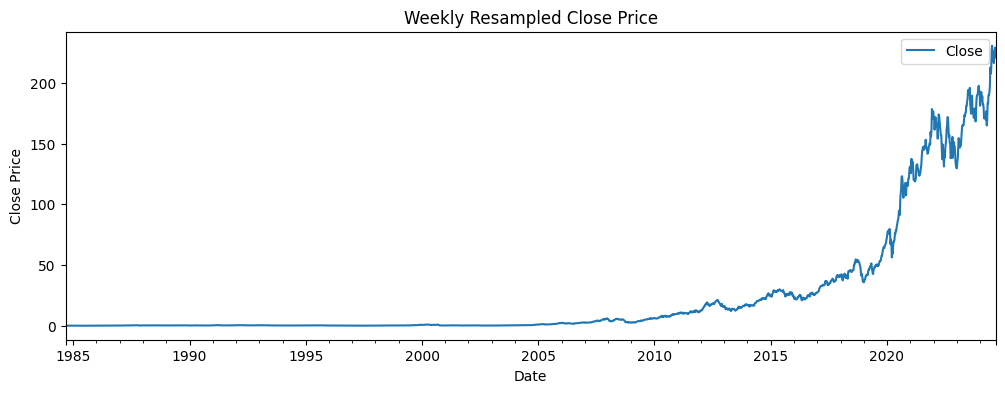

In [7]:
# Resample using weekly frequency (last business day of each week)
weekly_df = df['Close'].resample('W-FRI').last().to_frame()

# Visualize
weekly_df.plot(figsize=(12, 4), title="Weekly Resampled Close Price")
plt.ylabel('Close Price')
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler

close_scaler = MinMaxScaler()
weekly_df['Close_scaled'] = close_scaler.fit_transform(weekly_df[['Close']])

# Backup the original
weekly_df['Close_original'] = weekly_df['Close']
weekly_df.drop(columns='Close', inplace=True)

weekly_df.head()

,Close_scaled,Close_original
Date,,
1984-09-07,0.000197,0.100763
1984-09-14,0.000219,0.105937
1984-09-21,0.000202,0.101999
1984-09-28,0.000173,0.095289
1984-10-05,0.000169,0.094382


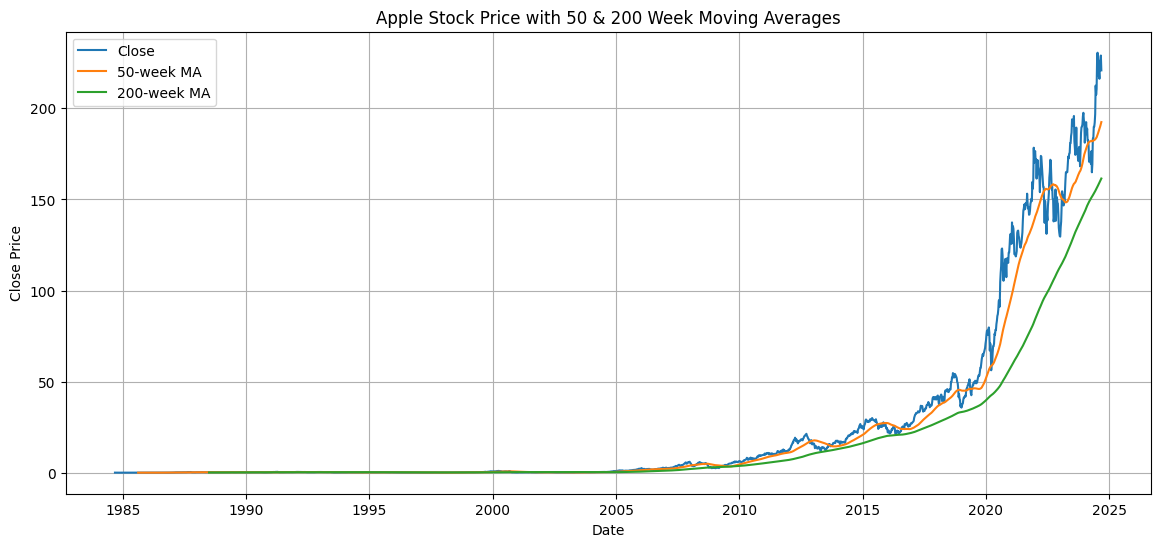

In [9]:
# Plot the weekly closing price along with 50-week and 200-week moving averages
# The 50-week MA (blue) reflects medium-term price trends and reacts more quickly to recent price changes.
# The 200-week MA (orange) captures long-term trends and acts as a strong indicator of overall momentum.
# When the 50-week MA crosses above the 200-week MA**, it may signal bullish momentum (a "Golden Cross").
# Conversely, a **cross below** could indicate bearish trends (a "Death Cross").

weekly_df['MA_50'] = weekly_df['Close_original'].rolling(window=50).mean()
weekly_df['MA_200'] = weekly_df['Close_original'].rolling(window=200).mean()

plt.figure(figsize=(14,6))
plt.plot(weekly_df['Close_original'], label='Close')
plt.plot(weekly_df['MA_50'], label='50-week MA')
plt.plot(weekly_df['MA_200'], label='200-week MA')
plt.title('Apple Stock Price with 50 & 200 Week Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

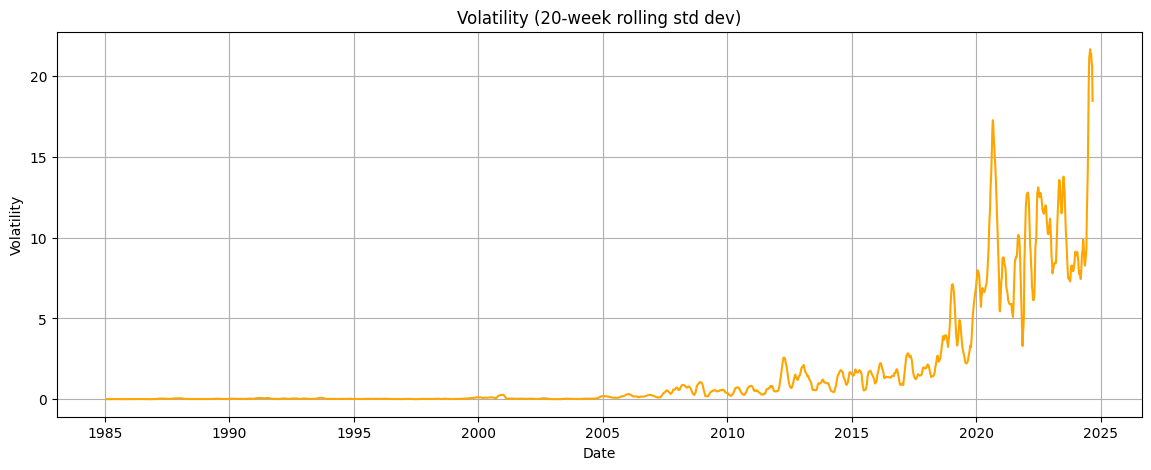

In [11]:
# This plot shows the 20-week rolling standard deviation of Apple’s closing stock price, which is a proxy for volatility.
# Higher values indicate periods of greater price fluctuation (market uncertainty or strong news impact).
# Lower values reflect stable price movements and calmer market conditions.
# Spikes in volatility may correspond to earnings reports, macroeconomic news, or significant events (e.g., COVID-19, product launches).

weekly_df['Volatility'] = weekly_df['Close_original'].rolling(window=20).std()

plt.figure(figsize=(14,5))
plt.plot(weekly_df['Volatility'], color='orange')
plt.title("Volatility (20-week rolling std dev)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.show()

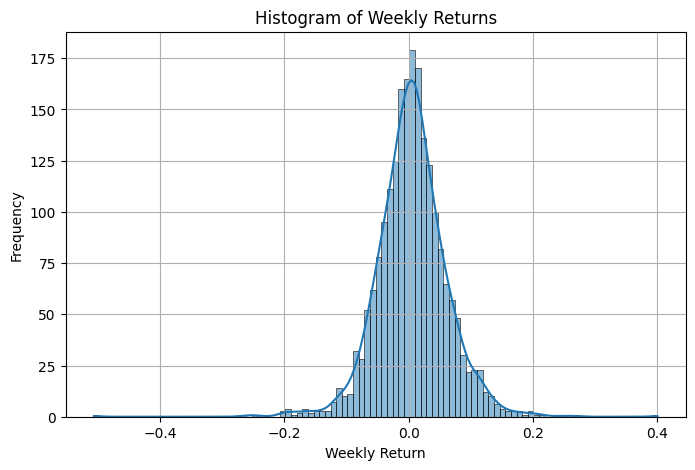

In [12]:
# Plotting the distribution of weekly returns to understand typical vs. extreme stock movements.
# The KDE curve (blue) helps visualize the probability density, showing skewness and fat tails.
# Most returns cluster near zero, but the presence of outliers (extreme gains/losses) indicates risk.
# This helps assess the stock’s return volatility, risk of sharp drops, and whether returns follow a normal distribution.

weekly_df['Returns'] = weekly_df['Close_original'].pct_change()

plt.figure(figsize=(8, 5))
sns.histplot(weekly_df['Returns'].dropna(), bins=100, kde=True)
plt.title("Histogram of Weekly Returns")
plt.xlabel("Weekly Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [13]:
weekly_df.head()

,Close_scaled,Close_original,MA_50,MA_200,Volatility,Returns
Date,,,,,,
1984-09-07,0.000197,0.100763,NaN,NaN,NaN,NaN
1984-09-14,0.000219,0.105937,NaN,NaN,NaN,0.051348
1984-09-21,0.000202,0.101999,NaN,NaN,NaN,-0.037173
1984-09-28,0.000173,0.095289,NaN,NaN,NaN,-0.065782
1984-10-05,0.000169,0.094382,NaN,NaN,NaN,-0.009520


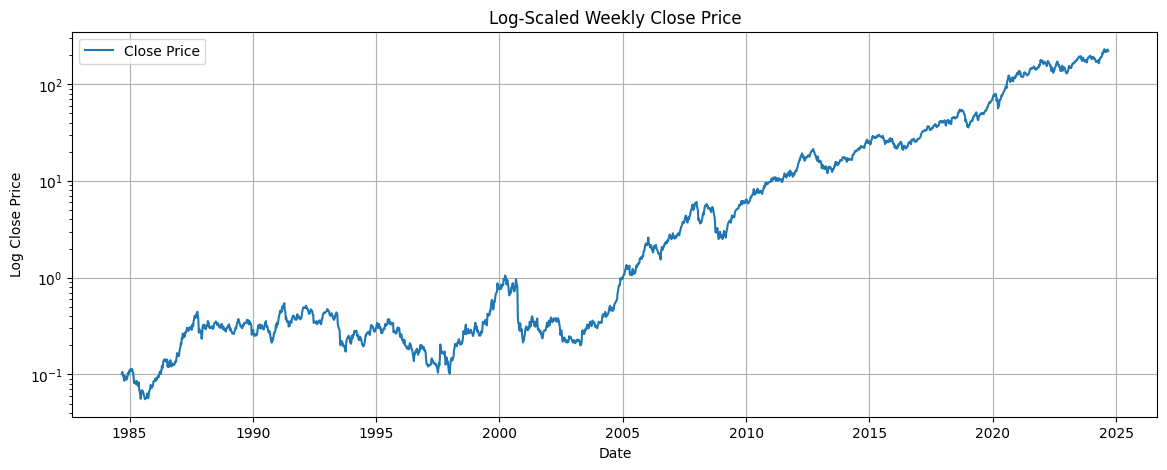

In [14]:
plt.figure(figsize=(14, 5))
plt.plot(weekly_df['Close_original'], label='Close Price')
plt.yscale('log')
plt.title("Log-Scaled Weekly Close Price")
plt.xlabel("Date")
plt.ylabel("Log Close Price")
plt.grid(True)
plt.legend()
plt.show()

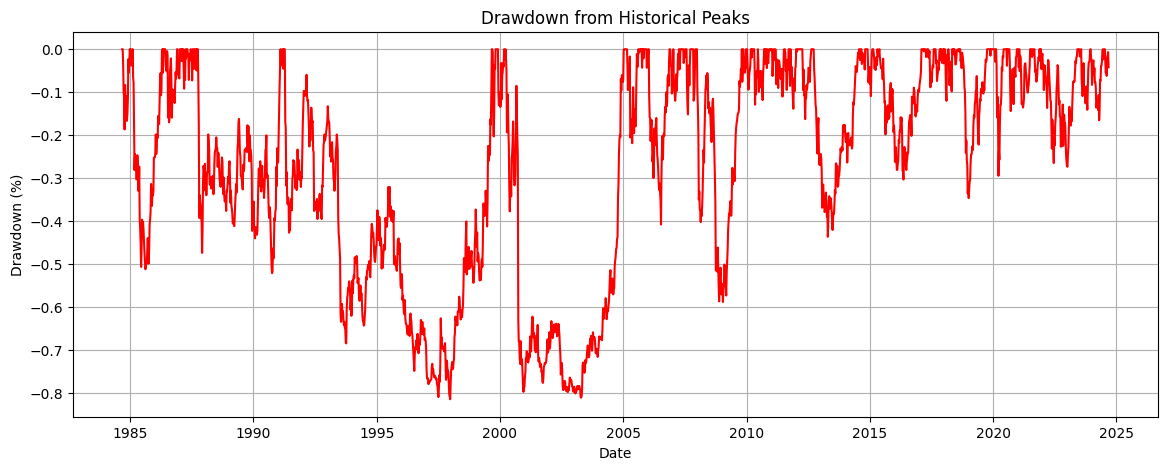

In [15]:
# Visualizing percentage drawdowns to identify periods when the stock fell from its historical peak.
# Useful for assessing downside risk and recovery depth during market dips.

cum_max = weekly_df['Close_original'].cummax()
drawdown = (weekly_df['Close_original'] - cum_max) / cum_max

plt.figure(figsize=(14,5))
plt.plot(drawdown, color='red')
plt.title("Drawdown from Historical Peaks")
plt.xlabel("Date")
plt.ylabel("Drawdown (%)")
plt.grid(True)
plt.show()

/var/folders/2g/_y68sjz94g9fc6j4lp69mr900000gn/T/ipykernel_2205/4253458543.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Returns', data=weekly_df.dropna(), palette='coolwarm')


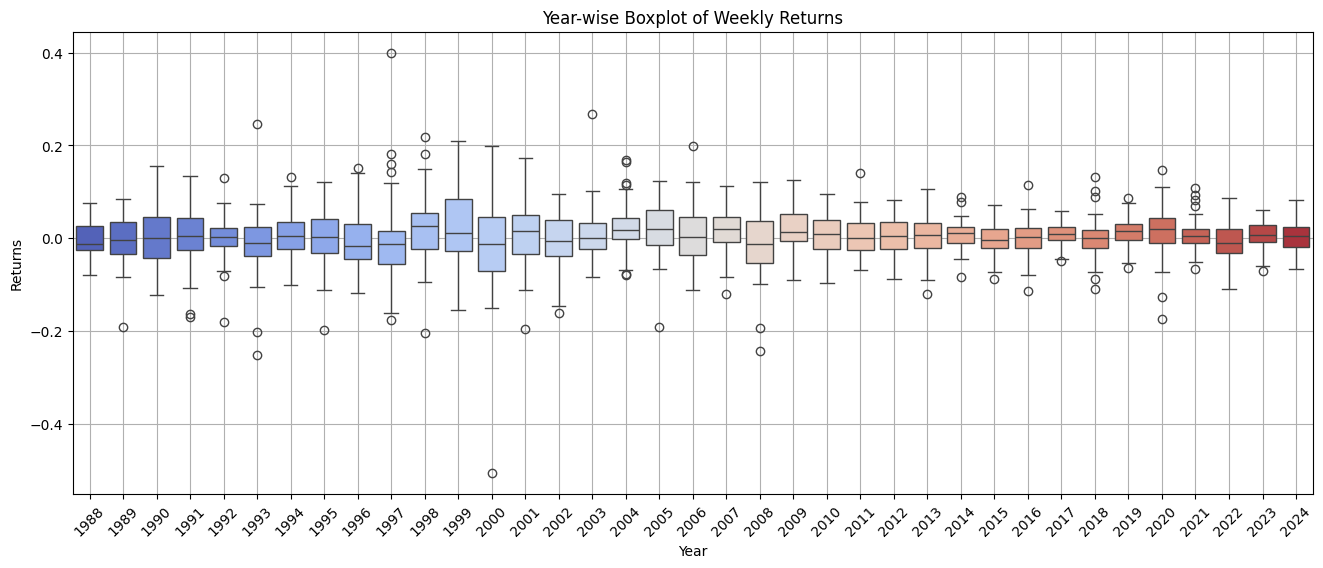

In [16]:
# Year-wise boxplot of weekly returns to observe changes in return distribution and volatility patterns across different years.
# Helps reveal high-risk or high-return years and outliers due to major events.

weekly_df['Year'] = weekly_df.index.year

plt.figure(figsize=(16,6))
sns.boxplot(x='Year', y='Returns', data=weekly_df.dropna(), palette='coolwarm')
plt.title("Year-wise Boxplot of Weekly Returns")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Clean up
weekly_df.drop(columns='Year', inplace=True)

In [17]:
weekly_df.head()

,Close_scaled,Close_original,MA_50,MA_200,Volatility,Returns
Date,,,,,,
1984-09-07,0.000197,0.100763,NaN,NaN,NaN,NaN
1984-09-14,0.000219,0.105937,NaN,NaN,NaN,0.051348
1984-09-21,0.000202,0.101999,NaN,NaN,NaN,-0.037173
1984-09-28,0.000173,0.095289,NaN,NaN,NaN,-0.065782
1984-10-05,0.000169,0.094382,NaN,NaN,NaN,-0.009520


In [18]:
def get_technical_indicators(dataset):
    dataset['ma7'] = dataset['Close_original'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Close_original'].rolling(window=21).mean()

    dataset['26ema'] = dataset['Close_original'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Close_original'].ewm(span=12).mean()
    dataset['MACD'] = dataset['12ema'] - dataset['26ema']

    dataset['20sd'] = dataset['Close_original'].rolling(window=20).std()
    dataset['upper_band'] = dataset['Close_original'].rolling(window=20).mean() + (2 * dataset['20sd'])
    dataset['lower_band'] = dataset['Close_original'].rolling(window=20).mean() - (2 * dataset['20sd'])

    dataset['ema'] = dataset['Close_original'].ewm(com=0.5).mean()
    dataset['momentum'] = dataset['Close_original'].pct_change()  # momentum as % change

    return dataset

In [19]:
def calculate_rsi(dataset, period=14):
    delta = dataset['Close_original'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    dataset['RSI'] = 100 - (100 / (1 + rs))
    
    return dataset

In [20]:
def get_fourier(dataset, top_components=100):
    close_fft = np.fft.fft(dataset['Close_original'].values)
    fft_filtered = np.copy(close_fft)
    fft_filtered[top_components:-top_components] = 0
    inverse_fft = np.fft.ifft(fft_filtered)
    
    dataset['Fourier'] = np.abs(inverse_fft)
    return dataset

In [21]:
def plot_technical_indicators(dataset, last_days=100):
    dataset = dataset.dropna().copy()
    dataset = dataset.iloc[-last_days:]
    x_ = dataset.index

    plt.figure(figsize=(16, 12), dpi=100)

    # Price + MA + BB
    plt.subplot(3, 1, 1)
    plt.plot(dataset['Close_original'], label='Close_original', color='blue')
    plt.plot(dataset['ma7'], label='MA 7', linestyle='--', color='green')
    plt.plot(dataset['ma21'], label='MA 21', linestyle='--', color='red')
    plt.plot(dataset['upper_band'], label='Upper BB', color='cyan')
    plt.plot(dataset['lower_band'], label='Lower BB', color='cyan')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.2)
    plt.title('Price + Moving Averages + Bollinger Bands')
    plt.legend()

    # MACD + Momentum
    plt.subplot(3, 1, 2)
    plt.plot(dataset['MACD'], label='MACD', linestyle='-.', color='purple')
    plt.plot(dataset['momentum'], label='Momentum', linestyle='-', color='orange')
    plt.title('MACD and Momentum')
    plt.axhline(0, color='gray', linestyle='--')
    plt.legend()

    # RSI
    plt.subplot(3, 1, 3)
    plt.plot(dataset['RSI'], label='RSI', color='darkgreen')
    plt.axhline(70, color='red', linestyle='--')
    plt.axhline(30, color='green', linestyle='--')
    plt.title('Relative Strength Index (RSI)')
    plt.legend()

    plt.tight_layout()
    plt.show()

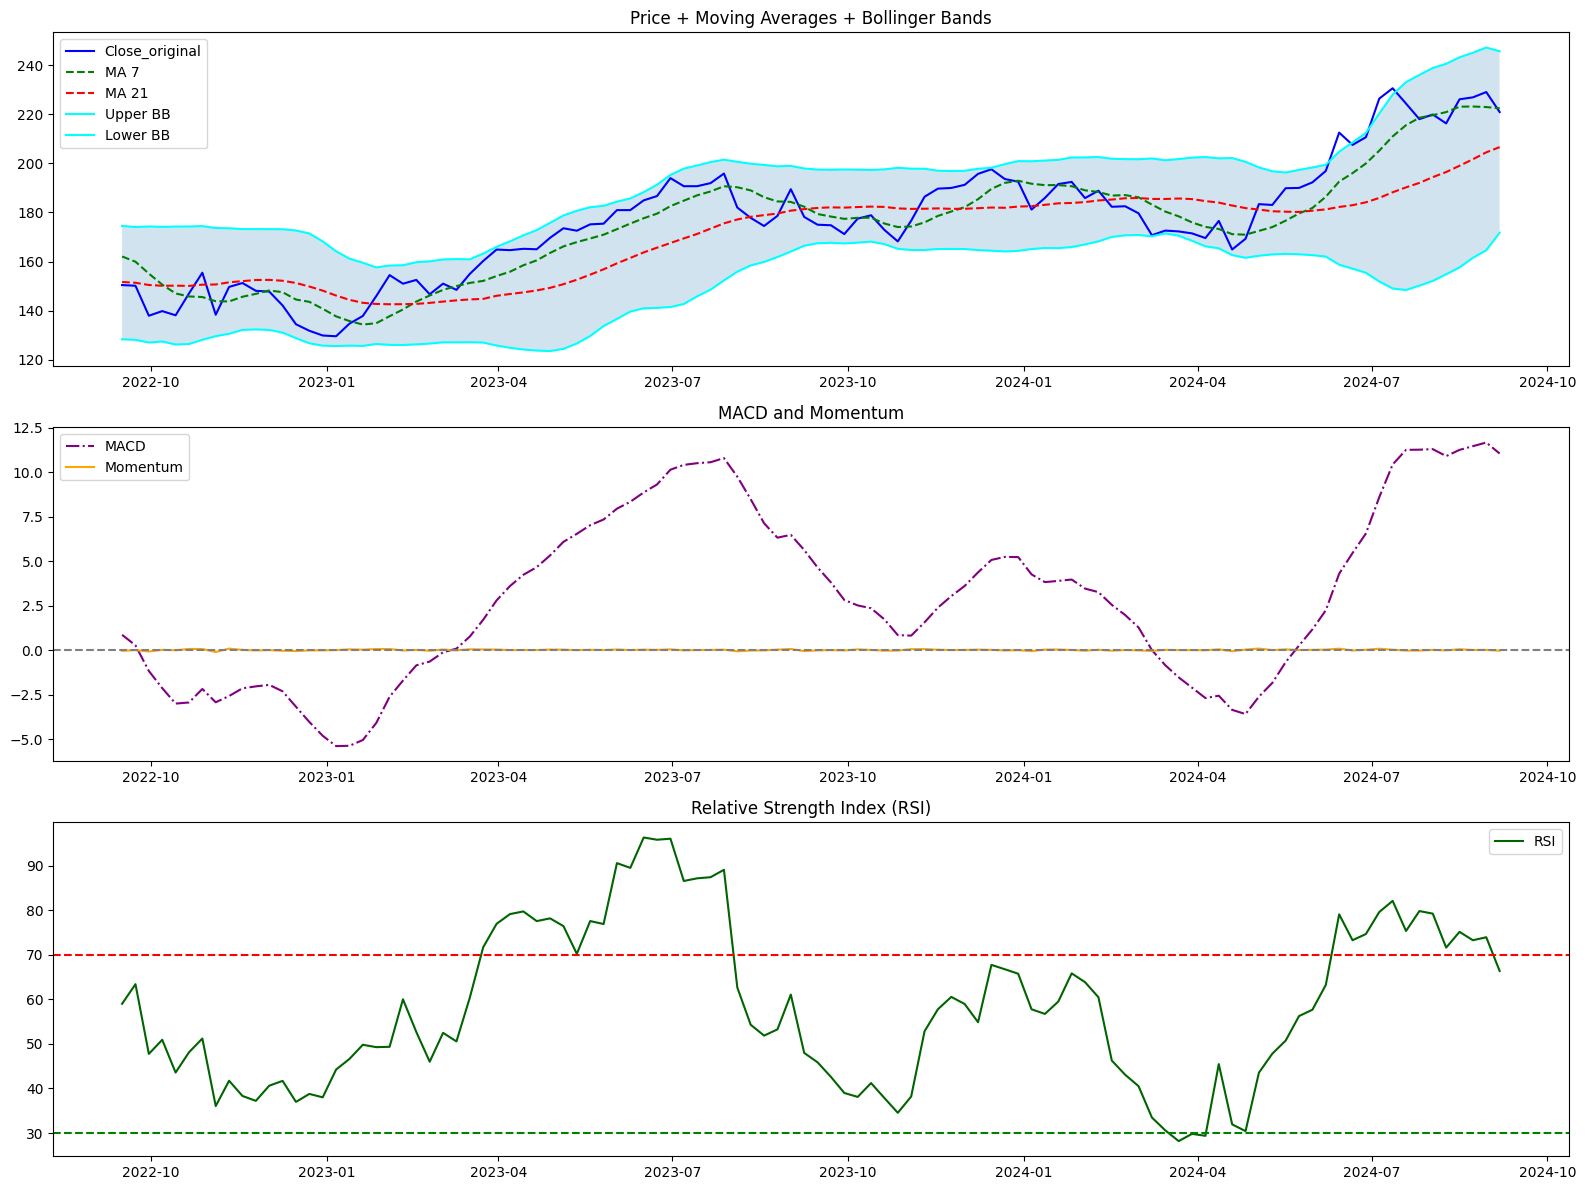

In [22]:
weekly_df = get_technical_indicators(weekly_df)
weekly_df = calculate_rsi(weekly_df)
weekly_df = get_fourier(weekly_df, top_components=100)

plot_technical_indicators(weekly_df, last_days=104)  # last 2 years of weekly data

### 📊 Technical Indicators for Market Behavior Analysis

This composite plot helps evaluate market behavior and sentiment using three powerful classes of indicators:

---

#### 1️⃣ **Price with Moving Averages & Bollinger Bands**
- **MA7 & MA21**: Short- and medium-term moving averages help capture short-term momentum and crossovers.
- **Bollinger Bands**: The shaded area shows volatility; wider bands indicate greater uncertainty.
- When price **touches or breaks outside** the bands, it can indicate potential **overbought/oversold** signals or **reversion to the mean**.

---

#### 2️⃣ **MACD and Momentum**
- **MACD (Moving Average Convergence Divergence)** identifies **trend strength and direction** using short and long EMAs.
- **Momentum** (rate of price change) highlights acceleration/deceleration of price movement.
- Both help spot trend reversals and **entry/exit opportunities**.

---

#### 3️⃣ **RSI (Relative Strength Index)**
- RSI quantifies overbought (above 70) or oversold (below 30) conditions.
- Useful for spotting **reversal points**, especially when combined with price action or MACD.

---

Together, these indicators provide a comprehensive view of trend, momentum, volatility, and potential reversal zones in the market over the last 2 years.

In [23]:
def plot_fourier_components(dataset, top_components=[3, 6, 9, 100]):
    close = dataset['Close_original'].values
    fft = np.fft.fft(close)
    
    plt.figure(figsize=(14, 7))
    for comp in top_components:
        filtered = np.copy(fft)
        filtered[comp:-comp] = 0
        ifft = np.fft.ifft(filtered)
        plt.plot(np.abs(ifft), label=f'{comp} components')
    plt.plot(close, label='Real Close', color='black', linewidth=1.5)
    plt.title('Fourier Transforms vs Original Close Prices')
    plt.legend()
    plt.show()

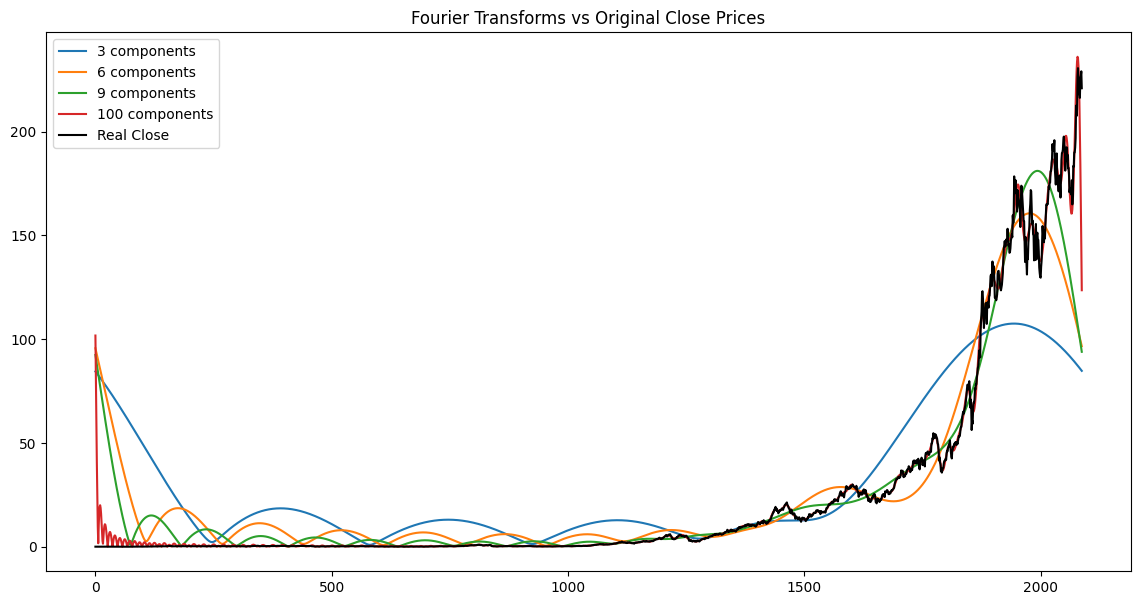

In [24]:
plot_fourier_components(weekly_df)

### Fourier Transform: Decomposing Market Trends

This plot compares the original closing price series (black) with smoothed reconstructions using different numbers of **Fourier components**.

- Lower components (e.g., 3 or 6) capture **long-term macro trends**, but lose local fluctuations.
- Higher components (e.g., 100) approximate the **true price series** closely, retaining both trend and noise.
- This technique reveals that stock prices contain **repeating patterns and cyclical signals** which can be modeled with sine/cosine functions.

Fourier analysis is especially useful in time series forecasting and **denoising**, helping to identify dominant cycles and suppress short-term volatility.

In [23]:
weekly_df.head()

,Close_scaled,Close_original,MA_50,MA_200,Volatility,Returns,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,RSI,Fourier
Date,,,,,,,,,,,,,,,,,,
1984-09-07,0.000197,0.100763,NaN,NaN,NaN,NaN,NaN,NaN,0.100763,0.100763,0.000000,NaN,NaN,NaN,0.100763,NaN,NaN,101.773304
1984-09-14,0.000219,0.105937,NaN,NaN,NaN,0.051348,NaN,NaN,0.103449,0.103566,0.000116,NaN,NaN,NaN,0.104644,0.051348,NaN,80.275377
1984-09-21,0.000202,0.101999,NaN,NaN,NaN,-0.037173,NaN,NaN,0.102928,0.102954,0.000026,NaN,NaN,NaN,0.102813,-0.037173,NaN,59.770141
1984-09-28,0.000173,0.095289,NaN,NaN,NaN,-0.065782,NaN,NaN,0.100793,0.100535,-0.000258,NaN,NaN,NaN,0.097734,-0.065782,NaN,40.865432
1984-10-05,0.000169,0.094382,NaN,NaN,NaN,-0.009520,NaN,NaN,0.099306,0.098863,-0.000443,NaN,NaN,NaN,0.095490,-0.009520,NaN,24.073648


## ARIMA and prophet

In [30]:
from statsmodels.tsa.arima.model import ARIMA

In [31]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def generate_arima_feature(series, order=(5,1,0), train_split=0.66):
    series = series.values
    size = int(len(series) * train_split)
    train, test = series[:size], series[size:]

    history = list(train)
    predictions = []

    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    error = mean_squared_error(test, predictions)
    print(f'[ARIMA] Test MSE: {error:.3f}')

    # Align predictions with original series
    arima_full = [None] * size + predictions
    return arima_full

In [32]:
weekly_df = weekly_df.copy()
weekly_df['ARIMA'] = generate_arima_feature(weekly_df['Close_original'], order=(5, 1, 0))

[ARIMA] Test MSE: 12.272


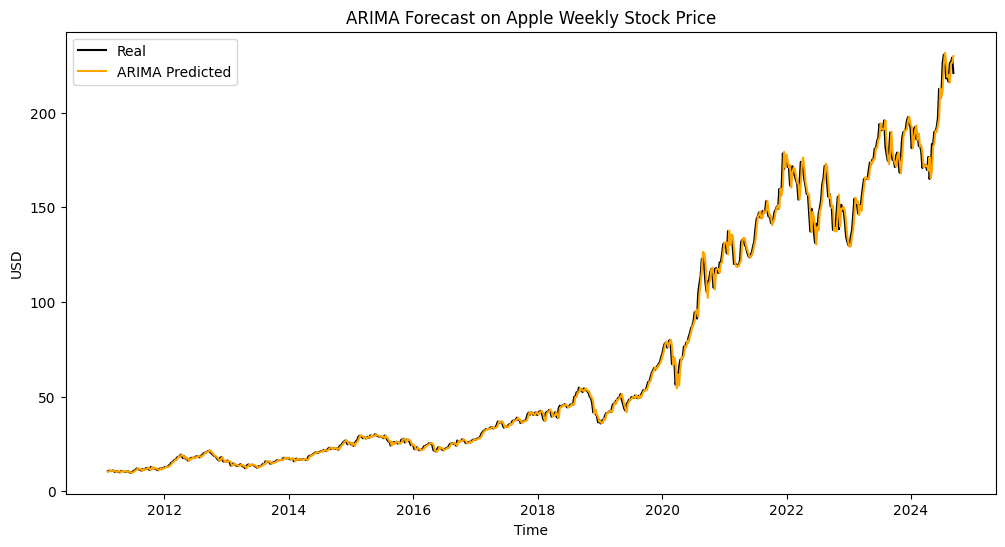

In [33]:
test_start = weekly_df['ARIMA'].first_valid_index()
plt.figure(figsize=(12, 6))
plt.plot(weekly_df['Close_original'][test_start:], label='Real', color='black')
plt.plot(weekly_df['ARIMA'][test_start:], label='ARIMA Predicted', color='orange')
plt.title('ARIMA Forecast on Apple Weekly Stock Price')
plt.xlabel('Time')
plt.ylabel('USD')
plt.legend()
plt.show()

### 📈 ARIMA Forecasting on Apple Weekly Stock Price

The **ARIMA (AutoRegressive Integrated Moving Average)** model is a classical time series forecasting technique that combines three components:

- **AR (AutoRegressive):** Uses past values to predict future ones.
- **I (Integrated):** Applies differencing to make the series stationary.
- **MA (Moving Average):** Incorporates past forecast errors to improve accuracy.

This model is effective for capturing **linear trends and temporal dependencies** in time series data.

#### 🔍 Plot Overview:
- The **black line** represents the actual weekly closing prices of Apple stock.
- The **orange line** shows the ARIMA model’s rolling predictions.
- The close alignment between the two lines in many regions indicates ARIMA's strength in modeling historical price behavior.

However, ARIMA may **underperform during sudden market shocks or non-linear movements**, making it a useful baseline for evaluating more advanced models like LSTM or BiLSTM with attention.

In [34]:
from prophet import Prophet

/Users/akshar/tfenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
prophet_df = weekly_df.reset_index()[['Date', 'Close_original']]
prophet_df.columns = ['ds', 'y']  # Prophet requires these exact names

In [36]:
# Initialize and fit
m = Prophet()
m.fit(prophet_df)

# Forecast next N weeks
future = m.make_future_dataframe(periods=52, freq='W')  # Forecast 1 year
forecast = m.predict(future)

18:37:12 - cmdstanpy - INFO - Chain [1] start processing
18:37:12 - cmdstanpy - INFO - Chain [1] done processing


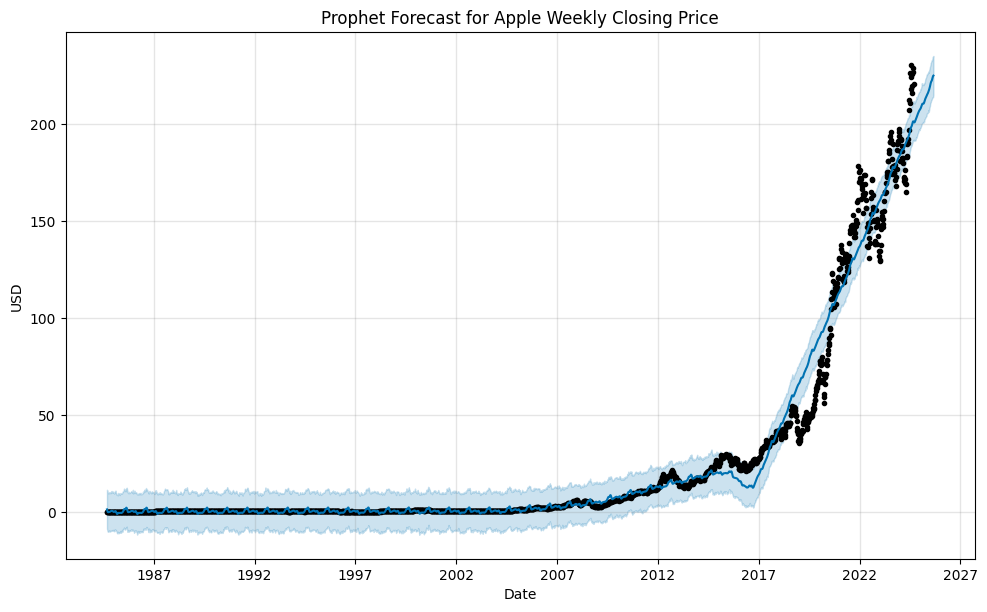

In [37]:
fig1 = m.plot(forecast)
plt.title('Prophet Forecast for Apple Weekly Closing Price')
plt.xlabel('Date')
plt.ylabel('USD')
plt.show()

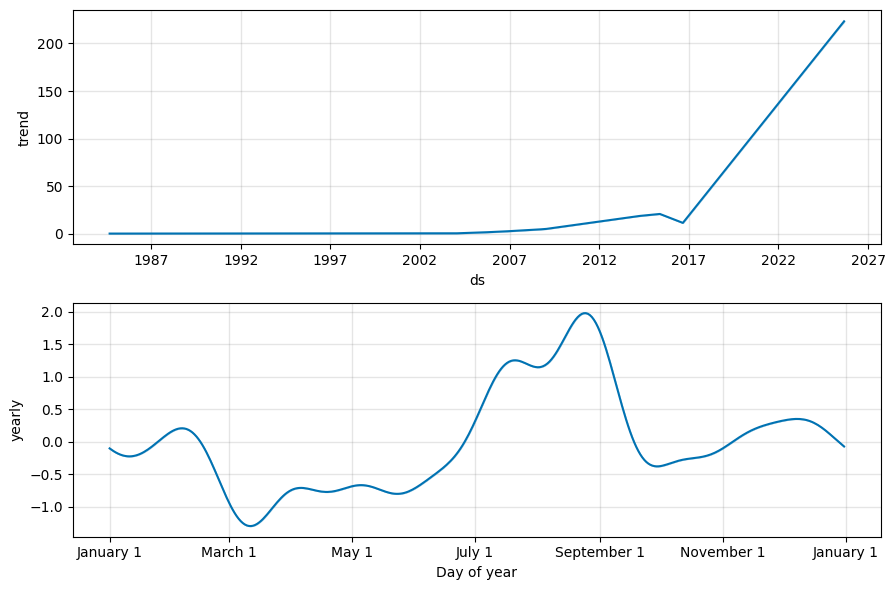

In [38]:
fig2 = m.plot_components(forecast)
plt.show()

### 🔮 Prophet Forecasting on Apple Weekly Closing Price

**Prophet** is an open-source forecasting tool developed by Facebook, designed for time series data that may contain **seasonality**, **holidays**, and **trend shifts**. It fits additive models where non-linear trends are combined with yearly, weekly, and daily seasonality components.

#### 📊 Plot 1: Forecast with Uncertainty Interval
- The **black dots** show the actual historical closing prices of Apple.
- The **blue line** represents Prophet's forecast.
- The **shaded region** shows the model's uncertainty interval (confidence bounds).
- The sharp upward trajectory reflects Prophet capturing the long-term exponential growth of Apple stock.

#### 🧠 Plot 2: Forecast Components
- **Trend**: Shows the long-term upward trajectory of the stock, with clear acceleration post-2020.
- **Yearly Seasonality**: Captures cyclic behavior within a year. For example, spikes near **August–September** could relate to product launches or Q4 sales momentum.

These visual insights help in understanding not just what Prophet forecasts, but **why** — based on learned trends and periodic patterns.

In [39]:
# Merge back into your df_weekly
prophet_pred = forecast[['ds', 'yhat']].set_index('ds')
weekly_df = weekly_df.join(prophet_pred.rename(columns={'yhat': 'Prophet'}), how='left')

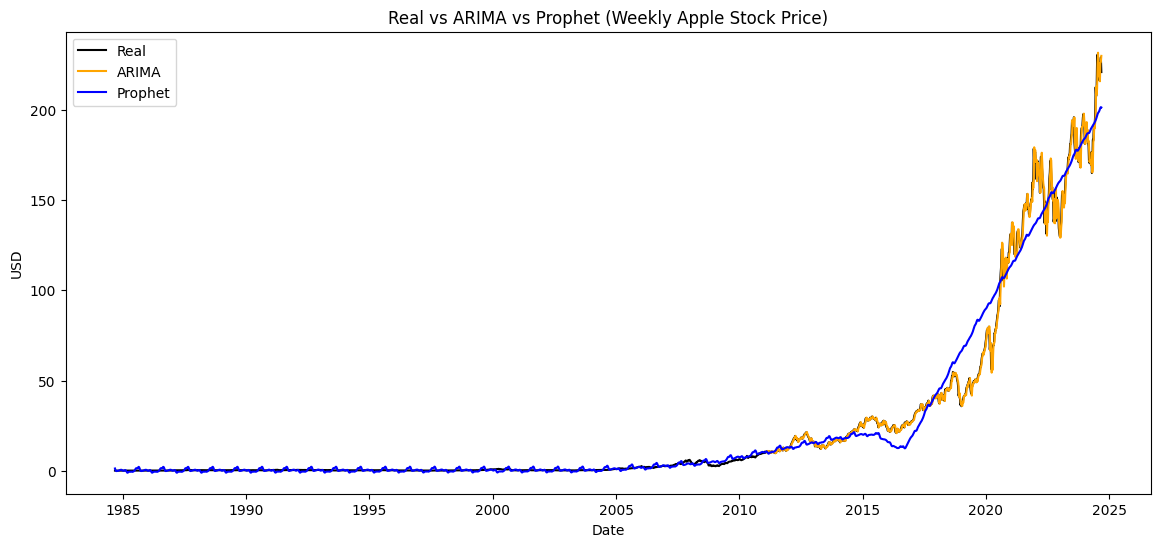

In [40]:
# Ensure date alignment
weekly_df['Prophet'] = forecast.set_index('ds').loc[weekly_df.index, 'yhat']

plt.figure(figsize=(14, 6))
plt.plot(weekly_df['Close_original'], label='Real', color='black')
plt.plot(weekly_df['ARIMA'], label='ARIMA', color='orange')
plt.plot(weekly_df['Prophet'], label='Prophet', color='blue')
plt.title('Real vs ARIMA vs Prophet (Weekly Apple Stock Price)')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.show()

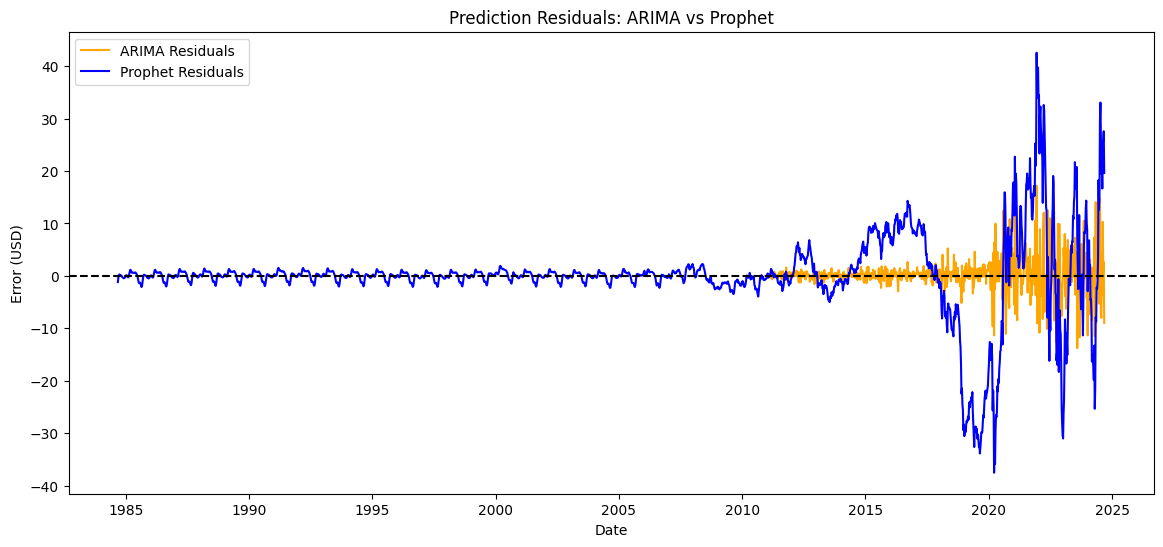

In [41]:
# This plot compares the residuals (prediction errors) of ARIMA and Prophet models over time.
# Residuals closer to zero indicate better accuracy — observe which model consistently stays near the baseline.

plt.figure(figsize=(14, 6))
plt.plot(weekly_df.index, weekly_df['Close_original'] - weekly_df['ARIMA'], label='ARIMA Residuals', color='orange')
plt.plot(weekly_df.index, weekly_df['Close_original'] - weekly_df['Prophet'], label='Prophet Residuals', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.title('Prediction Residuals: ARIMA vs Prophet')
plt.xlabel('Date')
plt.ylabel('Error (USD)')
plt.legend()
plt.show()

In [42]:
weekly_df.head()

,Close_scaled,Close_original,MA_50,MA_200,Volatility,Returns,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,RSI,Fourier,ARIMA,Prophet
Date,,,,,,,,,,,,,,,,,,,,
1984-09-07,0.000197,0.100763,NaN,NaN,NaN,NaN,NaN,NaN,0.100763,0.100763,0.000000,NaN,NaN,NaN,0.100763,NaN,NaN,101.773304,NaN,1.278968
1984-09-14,0.000219,0.105937,NaN,NaN,NaN,0.051348,NaN,NaN,0.103449,0.103566,0.000116,NaN,NaN,NaN,0.104644,0.051348,NaN,80.275377,NaN,0.511111
1984-09-21,0.000202,0.101999,NaN,NaN,NaN,-0.037173,NaN,NaN,0.102928,0.102954,0.000026,NaN,NaN,NaN,0.102813,-0.037173,NaN,59.770141,NaN,-0.009490
1984-09-28,0.000173,0.095289,NaN,NaN,NaN,-0.065782,NaN,NaN,0.100793,0.100535,-0.000258,NaN,NaN,NaN,0.097734,-0.065782,NaN,40.865432,NaN,-0.179292
1984-10-05,0.000169,0.094382,NaN,NaN,NaN,-0.009520,NaN,NaN,0.099306,0.098863,-0.000443,NaN,NaN,NaN,0.095490,-0.009520,NaN,24.073648,NaN,-0.140978


In [43]:
# Lag of 1 and 2 weeks
weekly_df["Close_lag_1"] = weekly_df["Close_scaled"].shift(1)
weekly_df["Close_lag_2"] = weekly_df["Close_scaled"].shift(2)

In [44]:
# Make sure the index is datetime
weekly_df["Month"] = weekly_df.index.month
weekly_df["Week"] = weekly_df.index.isocalendar().week.astype(int)
weekly_df["Quarter"] = weekly_df.index.quarter

In [45]:
weekly_df["Time_Index"] = np.arange(len(weekly_df))

In [46]:
for lag in range(1, 4):  # Add past 1, 2, 3 week close prices
    weekly_df[f'lag_{lag}'] = weekly_df['Close_original'].shift(lag)

In [47]:
weekly_df.dropna(inplace=True)

In [48]:
weekly_df.head()

,Close_scaled,Close_original,MA_50,MA_200,Volatility,Returns,ma7,ma21,26ema,12ema,...,Prophet,Close_lag_1,Close_lag_2,Month,Week,Quarter,Time_Index,lag_1,lag_2,lag_3
Date,,,,,,,,,,,,,,,,,,,,,
2011-02-04,0.045528,10.5488,8.407792,5.451885,0.524883,0.030881,10.177094,9.586909,9.355581,9.955219,...,10.694207,0.044156,0.042911,2,5,1,1378,10.2328,9.94566,10.60660
2011-02-11,0.046899,10.8649,8.500508,5.492475,0.560317,0.029965,10.321801,9.705088,9.467382,10.095170,...,10.704270,0.045528,0.044156,2,6,1,1379,10.5488,10.23280,9.94566
2011-02-18,0.046060,10.6715,8.580626,5.531983,0.528132,-0.017800,10.443437,9.789480,9.556576,10.183836,...,10.464873,0.046899,0.045528,2,7,1,1380,10.8649,10.54880,10.23280
2011-02-25,0.045740,10.5977,8.654611,5.569760,0.509011,-0.006916,10.495423,9.884549,9.633697,10.247507,...,10.036933,0.046060,0.046899,2,8,1,1381,10.6715,10.86490,10.54880
2011-03-04,0.047306,10.9586,8.738454,5.609208,0.550716,0.034055,10.545709,9.980045,9.731838,10.356906,...,9.626474,0.045740,0.046060,3,9,1,1382,10.5977,10.67150,10.86490


# Modeling

In [49]:
feature_cols = [col for col in weekly_df.columns if col not in ['Close_scaled', 'Close_original']]
scaler = MinMaxScaler()
weekly_df[feature_cols] = scaler.fit_transform(weekly_df[feature_cols])

weekly_df.head()

,Close_scaled,Close_original,MA_50,MA_200,Volatility,Returns,ma7,ma21,26ema,12ema,...,Prophet,Close_lag_1,Close_lag_2,Month,Week,Quarter,Time_Index,lag_1,lag_2,lag_3
Date,,,,,,,,,,,,,,,,,,,,,
2011-02-04,0.045528,10.5488,0.000000,0.000000,0.011018,0.638846,0.000223,0.000000,0.000000,0.000000,...,0.006443,0.002186,0.000885,0.090909,0.076923,0.0,0.000000,0.002186,0.000885,0.003879
2011-02-11,0.046899,10.8649,0.000504,0.000260,0.012676,0.636009,0.000903,0.000600,0.000565,0.000672,...,0.006496,0.003617,0.002186,0.090909,0.096154,0.0,0.001410,0.003617,0.002186,0.000885
2011-02-18,0.046060,10.6715,0.000939,0.000513,0.011170,0.488016,0.001474,0.001028,0.001016,0.001097,...,0.005249,0.005048,0.003617,0.090909,0.115385,0.0,0.002821,0.005048,0.003617,0.002186
2011-02-25,0.045740,10.5977,0.001341,0.000755,0.010275,0.521741,0.001718,0.001511,0.001405,0.001403,...,0.003019,0.004172,0.005048,0.090909,0.134615,0.0,0.004231,0.004172,0.005048,0.003617
2011-03-04,0.047306,10.9586,0.001796,0.001008,0.012227,0.648678,0.001954,0.001996,0.001901,0.001928,...,0.000881,0.003838,0.004172,0.181818,0.153846,0.0,0.005642,0.003838,0.004172,0.005048


In [50]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Bidirectional, LSTM, Layer, MultiHeadAttention, LayerNormalization, Add, GlobalMaxPooling1D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import LogCosh
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [51]:
feature_cols = ['Close_scaled', 'MA_50', 'MA_200', 'Volatility', 'Returns', 'ma7', 'ma21',
                '26ema', '12ema', 'MACD', '20sd', 'upper_band', 'lower_band', 'ema', 
                'momentum', 'RSI', 'Fourier', 'ARIMA', 'Prophet', 'Month', 'Week', 'Quarter', 'Time_Index']

# Drop rows with NaNs and convert to NumPy array
data_np = weekly_df[feature_cols].dropna().values

In [52]:
# Recreate input sequences
data_np = weekly_df[feature_cols].dropna().values

# --- 1. Sequence Generator ---
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i, :])
        y.append(data[i, 0])  # Close_scaled
    return np.array(X), np.array(y)

In [53]:
class AttentionLayer(Layer):
    def __init__(self, return_attention=False, **kwargs):
        self.return_attention = return_attention
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # input_shape = (batch_size, timesteps, features)
        self.W = self.add_weight(
            name='att_weight',
            shape=(input_shape[-1], 1),
            initializer='normal',
            trainable=True
        )
        self.b = self.add_weight(
            name='att_bias',
            shape=(input_shape[1], 1),  # timesteps
            initializer='zeros',
            trainable=True
        )
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)   # shape: (batch_size, timesteps, 1)
        a = K.softmax(e, axis=1)                # attention weights
        output = x * a                          # apply attention
        output = K.sum(output, axis=1)          # (batch_size, features)
        if self.return_attention:
            return [output, a]
        return output

    def compute_output_shape(self, input_shape):
        if self.return_attention:
            return [(input_shape[0], input_shape[2]), (input_shape[0], input_shape[1], 1)]
        return (input_shape[0], input_shape[2])

In [54]:
# --- 2. Build Model (Optuna-Optimized) ---
def build_optimized_bilstm(window_size, num_features):
    inputs = Input(shape=(window_size, num_features))
    
    x = Bidirectional(LSTM(64, return_sequences=True))(inputs)
    x = Dropout(0.4)(x)
    
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = Dropout(0.2)(x)

    attention_out, attention_weights = AttentionLayer(return_attention=True)(x)
    
    x = Dense(128, activation='relu')(attention_out)
    x = Dropout(0.2)(x)

    output = Dense(1, name="price_output")(x)
    model = Model(inputs=inputs, outputs={"price_output": output, "attention_layer_2": attention_weights})
    return model

In [55]:
# --- 3. Prepare Data ---
# Replace `weekly_df` and `feature_cols` with your actual DataFrame and selected features
data_np = weekly_df[feature_cols].dropna().values
window_size = 3
X, y = create_sequences(data_np, window_size)
num_features = X.shape[2]

In [56]:
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)

X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

In [136]:
# --- 5. Compile & Train Model ---
model = build_optimized_bilstm(window_size, num_features)
optimizer = Adam(learning_rate=0.0010284)

model.compile(
    optimizer=optimizer,
    loss={
        "price_output": LogCosh(),         # Only this will be trained
        "attention_layer_2": None          # No loss for attention output
    },
    metrics={
        "price_output": "mae"
    }
)


model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 3, 23)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_16                │ (None, 3, 128)         │        45,056 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_17                │ (None, 3, 128)         │        98,816 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_layer_3               │ [(None, 128), (None,   │           131 │
│ (AttentionLayer)                │ 3, 1)]                 │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ price_output (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,644 (627.52 KB)

 Trainable params: 160,644 (627.52 KB)

 Non-trainable params: 0 (0.00 B)

In [137]:
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=3)

In [138]:
history = model.fit(
    X_train, {"price_output": y_train},
    validation_data=(X_test, {"price_output": y_test}),
    epochs=100,
    batch_size=32,  
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - loss: 0.0060 - val_loss: 0.0589 - learning_rate: 0.0010
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 8.3885e-04 - val_loss: 0.0167 - learning_rate: 0.0010
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 5.1356e-04 - val_loss: 0.0165 - learning_rate: 0.0010
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 3.8529e-04 - val_loss: 0.0072 - learning_rate: 0.0010
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 3.9590e-04 - val_loss: 0.0072 - learning_rate: 0.0010
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 4.5747e-04 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 4.0298e-04 - val_loss: 0.0030 - learning_rate: 0.0010
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 4.6330e-04 - val_loss: 0.0011 - learning_rate: 0.0010
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 4.0423e-04 - val_loss: 0.0034 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


/Users/akshar/tfenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


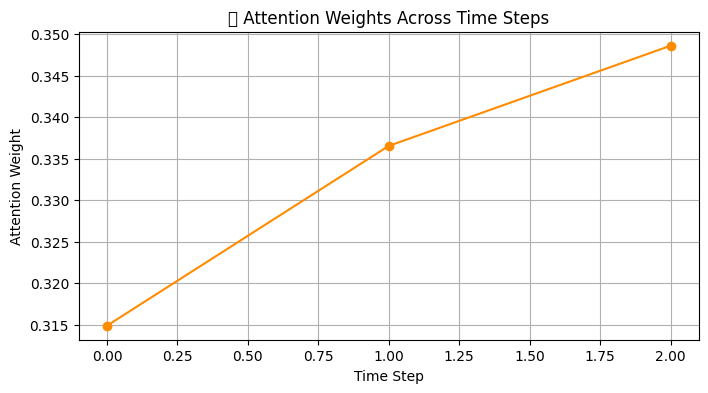

In [142]:
# Build and copy weights
att_model = build_optimized_bilstm(window_size, num_features)
att_model.set_weights(model.get_weights())  # model = trained model

# Predict a sample with attention
sample_idx = 12
input_sample = X_test[sample_idx:sample_idx+1]

# Predict (returns a dict)
pred_dict = att_model.predict(input_sample)

# Extract values from the dictionary
pred = pred_dict["price_output"]
att_weights = pred_dict["attention_layer_2"]

# Squeeze attention weights for plotting
att_weights = att_weights.squeeze()  # shape: (timesteps,) or (timesteps, 1)

# Plot Attention Weights
plt.figure(figsize=(8, 4))
plt.title("🔍 Attention Weights Across Time Steps")
plt.plot(att_weights, marker='o', color='darkorange')
plt.xlabel("Time Step")
plt.ylabel("Attention Weight")
plt.grid(True)
plt.show()

### 🔍 Attention Weights Visualization

This plot visualizes the attention weights assigned by the BiLSTM + Attention model for a single test input sequence.

- Each point on the x-axis represents a timestep in the input window.
- The corresponding y-values show how much **attention** the model gives to each timestep when generating the forecast.
- A higher attention weight means the model considered that timestep more influential in its final prediction.

In this case, the model assigns increasing attention to later timesteps, indicating that **recent prices carry more predictive significance** — a common trait in financial time series where recent trends often outweigh older ones.

In [111]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


# Evaluation on train
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)

# Evaluation on test
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print results
print(f"BiLSTM RMSE (Train, scaled): {rmse_train:.4f}")
print(f"BiLSTM MAE  (Train, scaled): {mae_train:.4f}")
print(f"BiLSTM RMSE (Test,  scaled): {rmse_test:.4f}")
print(f"BiLSTM MAE  (Test,  scaled): {mae_test:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
BiLSTM RMSE (Train, scaled): 0.0092
BiLSTM MAE  (Train, scaled): 0.0067
BiLSTM RMSE (Test,  scaled): 0.0374
BiLSTM MAE  (Test,  scaled): 0.0294


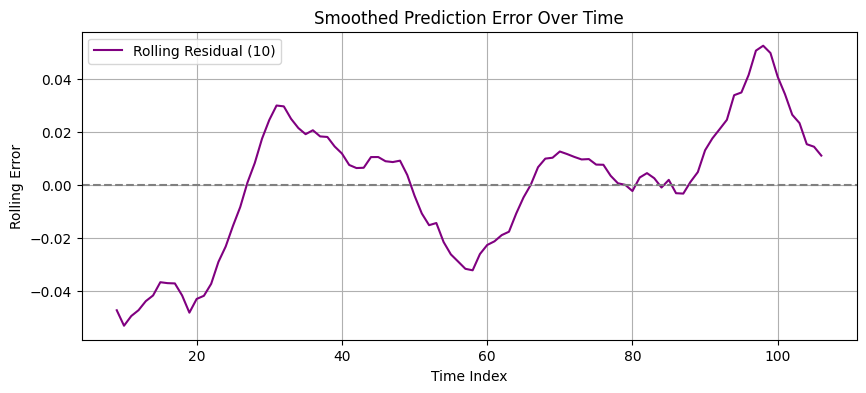

In [146]:
rolling_errors = pd.Series(residuals).rolling(window=10).mean()
plt.figure(figsize=(10, 4))
plt.plot(rolling_errors, label="Rolling Residual (10)", color='purple')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Smoothed Prediction Error Over Time")
plt.xlabel("Time Index")
plt.ylabel("Rolling Error")
plt.legend()
plt.grid(True)
plt.show()

### 📉 Smoothed Prediction Error Over Time

This plot visualizes the **10-step rolling average of prediction residuals**, offering a smoothed perspective of how model errors evolved over time.

- The **rolling residuals** help filter out short-term noise and reveal underlying trends in model performance.
- Spikes and swings in the curve suggest periods where the model consistently **over- or under-predicted** the actual values.
- The plot also aids in identifying **drift, volatility, or regime changes** in the stock's behavior that the model may struggle to capture.

Analyzing this residual trend can guide further tuning or highlight time windows worth deeper investigation.

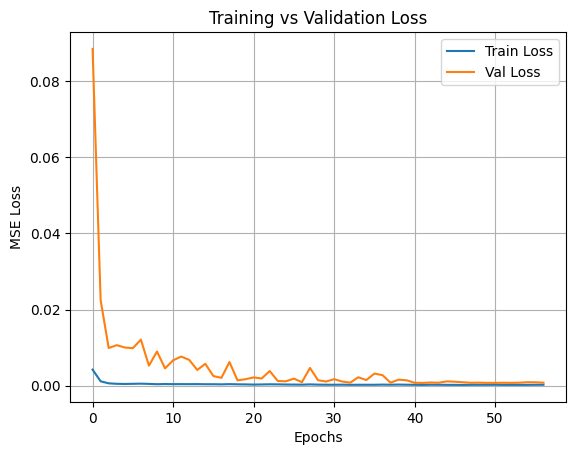

In [113]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()

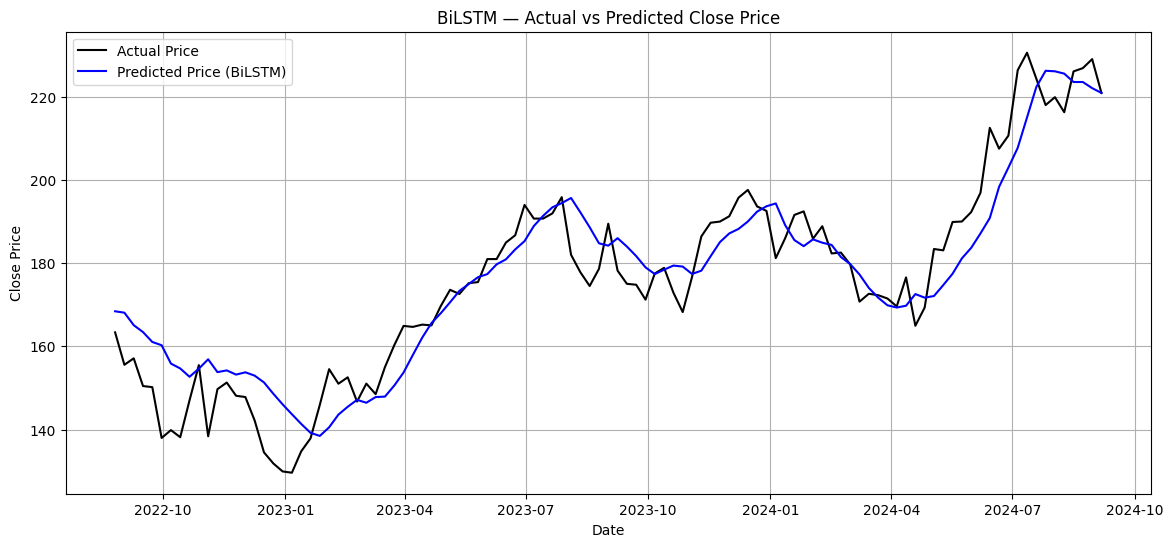

In [118]:
valid_indices = weekly_df[feature_cols].dropna().index
date_indices = valid_indices[window_size:]  # adjust for window size shift

# Get test dates from the last portion of date_indices
test_dates = date_indices[-len(y_test):]

# Inverse transform predictions and actual values (ensure shape is correct)
y_test_inv = close_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = close_scaler.inverse_transform(y_test_pred.reshape(-1, 1))

# Plot
plt.figure(figsize=(14, 6))
plt.plot(test_dates, y_test_inv, label='Actual Price', color='black')
plt.plot(test_dates, y_pred_inv, label='Predicted Price (BiLSTM)', color='blue')
plt.title("BiLSTM — Actual vs Predicted Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

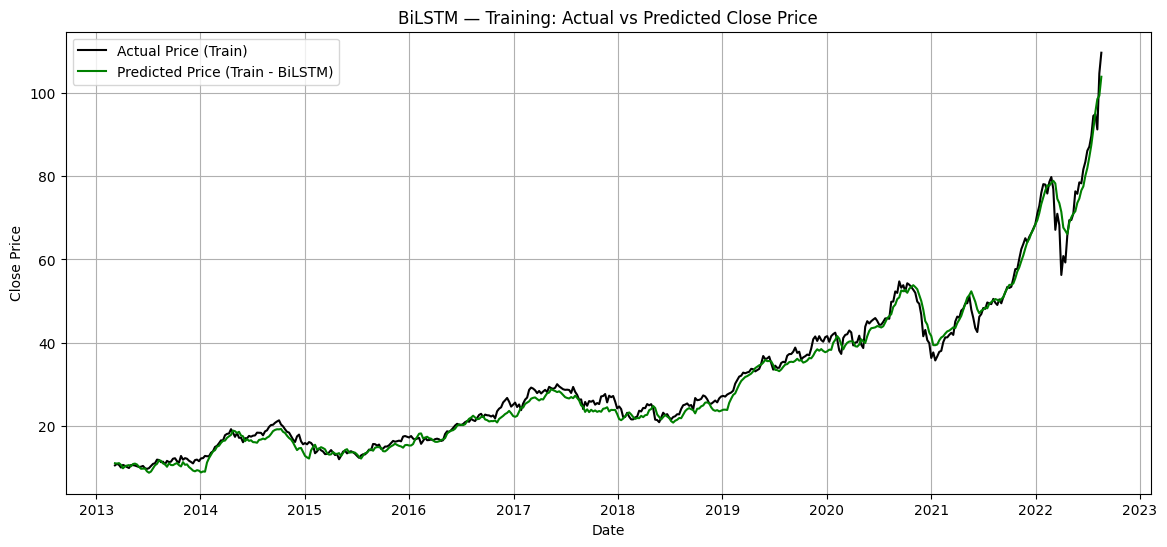

In [115]:
# 1. Inverse transform the predictions and true values for training
y_train_inv = close_scaler.inverse_transform(y_train.reshape(-1, 1))
y_train_pred_inv = close_scaler.inverse_transform(y_train_pred.reshape(-1, 1))

# 2. Get training date range (same length as y_train)
train_dates = weekly_df.index[-(len(y_train) + len(y_test)) : -len(y_test)]

# 3. Plot
plt.figure(figsize=(14, 6))
plt.plot(train_dates, y_train_inv, label='Actual Price (Train)', color='black')
plt.plot(train_dates, y_train_pred_inv, label='Predicted Price (Train - BiLSTM)', color='green')
plt.title("BiLSTM — Training: Actual vs Predicted Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

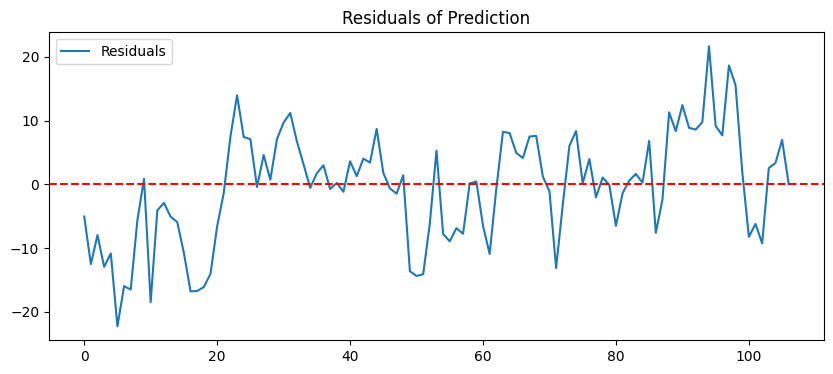

In [117]:
import matplotlib.pyplot as plt

residuals = y_test_actual - preds_actual
plt.figure(figsize=(10, 4))
plt.plot(residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of Prediction')
plt.legend()
plt.show()

### 📉 Rolling Residual Plot (BiLSTM)

This plot displays the 10-point rolling average of prediction residuals (actual - predicted) from the BiLSTM model on the test set.

- The residuals exhibit multiple visible **spikes**, indicating varying levels of prediction error across different periods.
- Periods of **positive spikes** show where the model underestimated the price, while **negative dips** indicate overestimation.
- The pattern suggests the model's performance varies over time rather than maintaining consistent accuracy.

This visualization helps track the **temporal behavior of prediction errors** and assess stability.

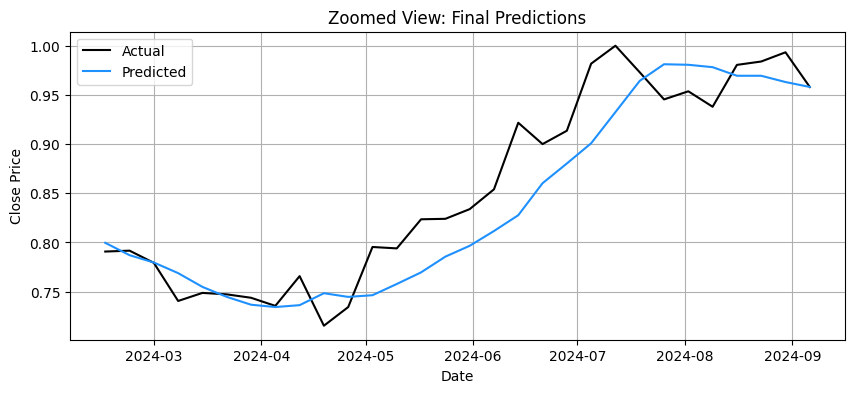

In [153]:
zoom_len = 30
plt.figure(figsize=(10, 4))
plt.plot(test_dates[-zoom_len:], y_test[-zoom_len:], label='Actual', color='black')
plt.plot(test_dates[-zoom_len:], y_test_pred[-zoom_len:], label='Predicted', color='dodgerblue')
plt.title("Zoomed View: Final Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()